In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [19]:
def get_lower_and_upper_bounds(col, multiplier = 1.5):
    '''
    This function takes in a pandas Series and multiplier for IQR (default is 1.5).
    It returns the lower and upper bounds.
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    inner_lower_fence = round(q1 - (multiplier * iqr), 3)
    inner_upper_fence = round(q3 + (multiplier * iqr), 3)
    
    return inner_lower_fence, inner_upper_fence


### 1. Using lemonade.csv dataset and focusing on continuous variables

In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

### b. Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense?Which outliers should be kept?

In [20]:
get_lower_and_upper_bounds(df.Temperature, multiplier = 1.5)

(16.7, 104.7)

In [42]:
def get_outliers(df, multiplier = 1.5):
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            print ([col])
            lower, upper = get_lower_and_upper_bounds(df[col], multiplier = multiplier)
            print(lower, upper)

In [43]:
get_outliers(df)

['Temperature']
16.7 104.7
['Rainfall']
0.26 1.3
['Flyers']
4.0 76.0
['Price']
0.5 0.5
['Sales']
5.0 45.0


### c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

### d. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [44]:
get_outliers(df, multiplier = 3)

['Temperature']
-16.3 137.7
['Rainfall']
-0.13 1.69
['Flyers']
-23.0 103.0
['Price']
0.5 0.5
['Sales']
-10.0 60.0


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?


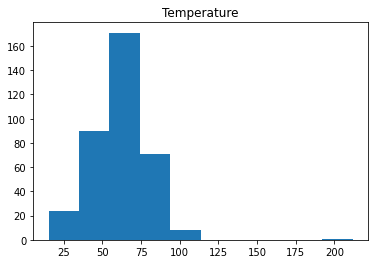

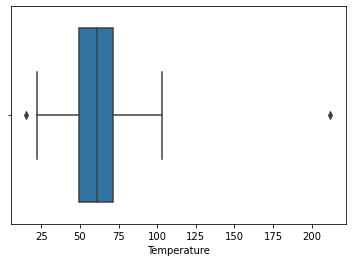

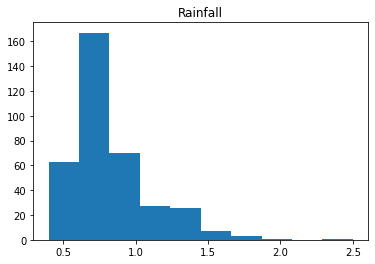

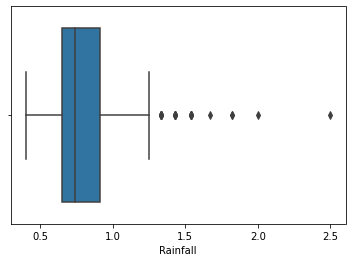

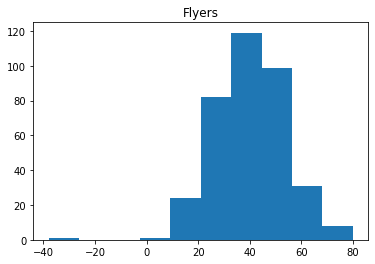

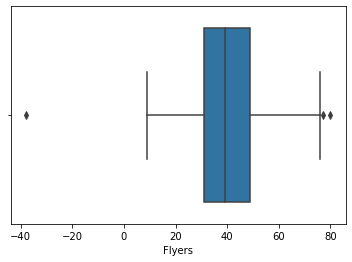

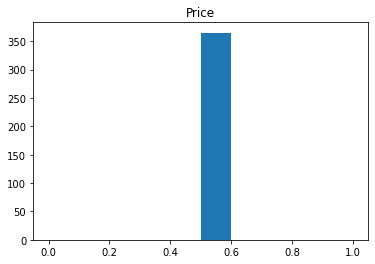

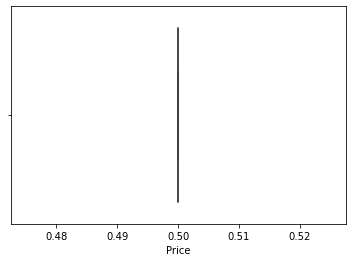

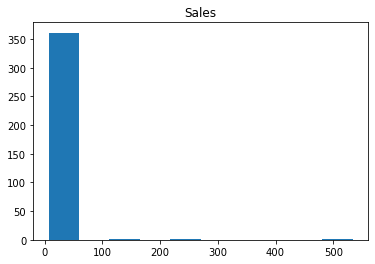

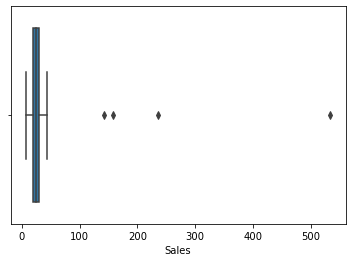

In [46]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.grid(False)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

### Takeaways

- Temperature and Flyers are roughly normally distributed


### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv